<a href="https://colab.research.google.com/github/Elakkiya1802/ML-tasks/blob/main/Task5(customer_churn_prediction_%5BDT%5D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset:
   tenure  monthly_charges  total_charges  contract_type  churn
0       1              200            200              0      1
1       5               70            350              1      0
2      10               80            800              1      0
3       2              150            300              0      1
4       8               60            480              1      0
5       3              180            540              0      1
6      15               40            600              2      0
7      20               30            800              2      0
8       1              210            210              0      1
9      25               20            500              2      0

Accuracy: 0.6666666666666666

Confusion Matrix:
 [[0 1]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                     

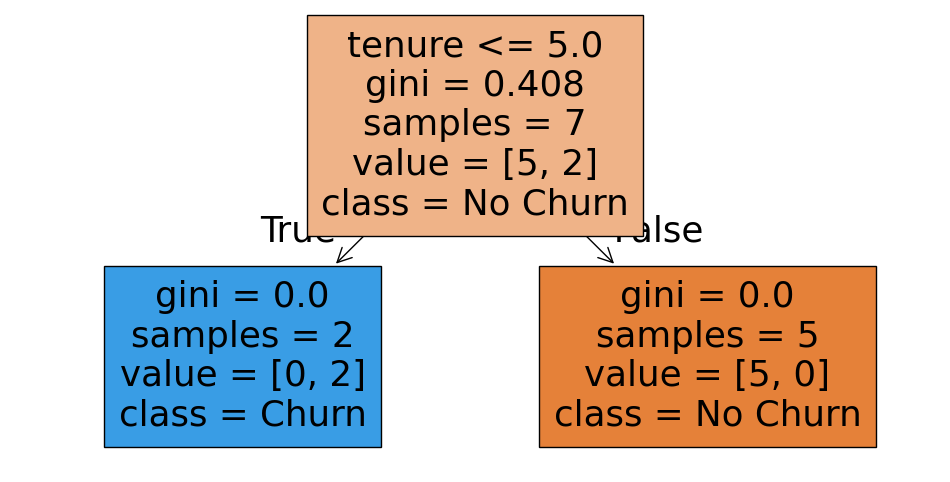

In [4]:
# customer_churn_decision_tree.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create Synthetic Dataset

data = {
    "tenure": [1, 5, 10, 2, 8, 3, 15, 20, 1, 25],
    "monthly_charges": [200, 70, 80, 150, 60, 180, 40, 30, 210, 20],
    "total_charges": [200, 350, 800, 300, 480, 540, 600, 800, 210, 500],
    "contract_type": [0, 1, 1, 0, 1, 0, 2, 2, 0, 2],  # 0=Month-to-month, 1=One year, 2=Two year
    "churn": [1, 0, 0, 1, 0, 1, 0, 0, 1, 0]  # 1=Churned, 0=Stayed
}

df = pd.DataFrame(data)

print("Dataset:")
print(df)

# Step 2: Split Features and Target

X = df.drop("churn", axis=1)
y = df["churn"]

# Step 3: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Decision Tree Model

model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

# Predictions

y_pred = model.predict(X_test)

# Evaluation

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred,zero_division=0))

# Visualize the Tree

plt.figure(figsize=(12, 6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No Churn", "Churn"],
    filled=True
)
plt.show()
